In [53]:
import treecorr
import astropy.io.fits as fits
import time
import numpy as np
import matplotlib.pyplot as plt

In [54]:
data_dir = '/home/b7009348/projects/WGL_Project/DES-data/'
file_name = 'y1_im3shape_corrected_0.9-1.3.fits'
#file_name = 'y1_im3shape_flags=0.fits'
with fits.open(data_dir+file_name) as hdu:
    data = hdu[1].data
print(data.dtype)
print(data.size)

(numpy.record, [('coadd_objects_id', '>i8'), ('e1', '>f8'), ('e2', '>f8'), ('m', '>f8'), ('c1', '>f8'), ('c2', '>f8'), ('weight', '>f8'), ('radius', '>f8'), ('snr', '>f8'), ('likelihood', '>f8'), ('chi2_pixel', '>f8'), ('flags', '>i4'), ('covmat_0_0', '>f8'), ('covmat_0_1', '>f8'), ('covmat_1_1', '>f8'), ('rgpp_rp', '>f8'), ('psf_e1', '>f8'), ('psf_e2', '>f8'), ('psf_size', '>f8'), ('bulge_fraction', '>f8'), ('nexp', '>i4'), ('stamp_size', '>i4'), ('mask_fraction', '>f8'), ('flags_select', '>i4'), ('ra', '>f8'), ('dec', '>f8'), ('tilename', 'S12')])
2013303


In [75]:
config = {'dec_col' : 'dec', 'dec_units' : 'degrees', 'file_name' : data_dir+file_name, 
         'g1_col' : 'e1', 'g2_col' : 'e2', 'max_sep' : 250, 
         'min_sep' : 2.5, 'nbins' : 20, 'ra_col' : 'ra', 'ra_units' : 'degrees',
         'sep_units' : 'arcmin', 'verbose' : 2, 'flip_g1' : False,
         'flip_g2' : False}

In [76]:
cat  = treecorr.Catalog(data_dir+file_name, config)

Reading input file /home/b7009348/projects/WGL_Project/DES-data/y1_im3shape_corrected_0.9-1.3.fits
   file_type assumed to be FITS from the file name.
   nobj = 2013303


In [77]:
gg = treecorr.GGCorrelation(min_sep=2.5, max_sep=250, nbins=20, sep_units='arcmin')

In [78]:
start = time.time()
gg.process(cat)
end = time.time()
print('Runtime: %.6f'%(end-start))

Runtime: 3.393926


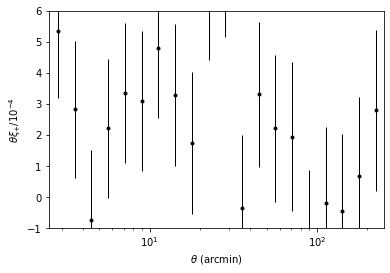

In [79]:
r = np.exp(gg.meanlogr)
xip = gg.xip
sig = np.sqrt(gg.varxip)
plt.errorbar(r, r*xip/1e-4, yerr=r*sig/1e-4, marker='.', linewidth=0, 
             elinewidth=1, color='black')
plt.xscale('log')
plt.ylabel(r'$\theta\xi_{+}/10^{-4}$')
plt.xlabel(r'$\theta$ (arcmin)')
plt.xlim([2.5,250])
plt.ylim([-1,6])
plt.savefig('z=0.9-1.3_shear-shear.png',dpi=150)
#plt.plot(r, -xip, color='blue')
#plt.errorbar(r[xip>0], xip[xip>0], yerr=sig[xip>0], color='grey')
#plt.errorbar(r[xip<0], xip[xip<0], yerr=sig[xip<0], color='grey')
#lp = plt.errorbar(-r, xip, yerr=sig, color='blue')